# Motivational Example

Let's start our course with a motivational example demonstrating a **simple end-to-end Machine Learning project** from start to finish to show you what a typical data science workflow looks like.

The example is complex on purpose as it introduces topics from almost all upcoming lectures:

- Intro to the environment and tools + Python basics
- Understanding, extracting, sourcing, and processing data
- What is AI/ML & Basic concepts in AI/ML & AI project and workflow
- (Zoo of) ML techniques (algorithms) & Training and improving ML models (ML Pipelines)
- Evaluating, comparing, and selecting ML models

At the end of the course, you will have a deeper understanding and some practical experience with those topics.

## The Problem

We are helping a client to build a mobile app for field researchers that helps them identify and track flower species. With a new app version, the client wants to automate the identification part somewhat.

At first, the client wants to assess the feasibility of this potential feature by building a POC. Luckily, the client can provide a reasonable [dataset](https://archive.ics.uci.edu/ml/datasets/iris) consisting of **four measurements** (sepal length, sepal width, petal length, and petal width) and **identity** (Iris-Setosa, Iris-Versicolour, Iris-Virginica) per sample.

![An example of Iris plant](../../static/images/petal_sepal.jpeg "An example of Iris plant")

> ✏️ The example is inspired by {cite}`rhiever`. Some sections are reduced or extended compare to the original example.

Before diving straight into coding, let's give several thoughts on the problem we are about to work on and ask some follow-up questions.

First, let's identify the use case. We are asked to classify the species (i.e., class) of the flower based on four measurements that we're provided: sepal length, sepal width, petal length, and petal width. The solution should run in a mobile app, so we should consider it.

> ✏️ Researchers collected data. It might be a good indicator of data quality, and we might be able to create a good solution. However, be aware that it could perform poorly if ordinary users use the solution because researchers are probably more precise in taking measurements.

We haven't received any definition of success from the client yet. So, let's ask. **The client told us that he wants to be able to classify 90% of flowers correctly.** Well, we do not know the data yet so let's have a follow-up conversation about the feasibility and reasonability later on.

> ✏️ For education purposes, libraries are imported once they are in use.

## Loading and Checking Data

The next step is to look at the data we're working with. Even curated data sets have errors; finding issues early on can save time later on.

Generally, we're looking to answer the following questions:

- Is there anything wrong with the data?
- Do I need to fix or remove any of the data?

Let's start by downloading the dataset.

> ✏️ To make the exercise reproducible, we use one of the datasets easily accessible with _sklearn_. Check out the [Toy datasets documentation](https://scikit-learn.org/stable/datasets/toy_dataset.html) to find more valuable datasets for initial experiments.

In [1]:
from sklearn.datasets import load_iris

iris_data = load_iris(as_frame=True)
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Let's load the dataset to a pandas data frame with many convenient utilities for the analysis and visualizing several samples.

In [2]:
import pandas as pd

data_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
data_df['species'] = pd.Series(iris_data.target).map(lambda i: iris_data.target_names[i])
data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Exercises: add some noise to data

Now is the perfect time to do some checks of our data. In general, we want to make sure that:

- Data is encoded correctly.
- Data falls within the expected range, and use domain knowledge whenever possible to define that expected range.
- Deal with missing data in one way or another: replace it or drop it.

Pandas can easily compute some summary statistics for us:

In [4]:
data_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


By evaluating counts we can see that all values are present in numerical columns. However, we should use code as a record and implement checks as a good practice. For example, check that all data in _sepal length_ are filled with a numerical value.

In [5]:
assert sum(~data_df['sepal length (cm)'].isnull()) == len(data_df)

Let's use some expert domain knowledge (as we asked several researchers) and check that that _sepal lengths_ for _Iris-Versicolour_ should never be below 2.5 cm

In [6]:
assert data_df.loc[data_df['species'] == 'versicolor', 'sepal length (cm)'].min() >= 2.5

Let's bring some visualization capabilities to our notebook to understand our data better. This brings us to a next tip. Plot everything you can about the data at this stage of the analysis, so you can visually confirm everything looks correct.

In [7]:
# this line tells the notebook to show plots inside the notebook
%matplotlib inline

import seaborn as sns

Next, let's create a **scatterplot** matrix. Scatterplot matrices plot the distribution of each column along the diagonal, and then plot a scatterplot matrix for the combination of each variable. They make for an efficient tool to look for errors in our data.

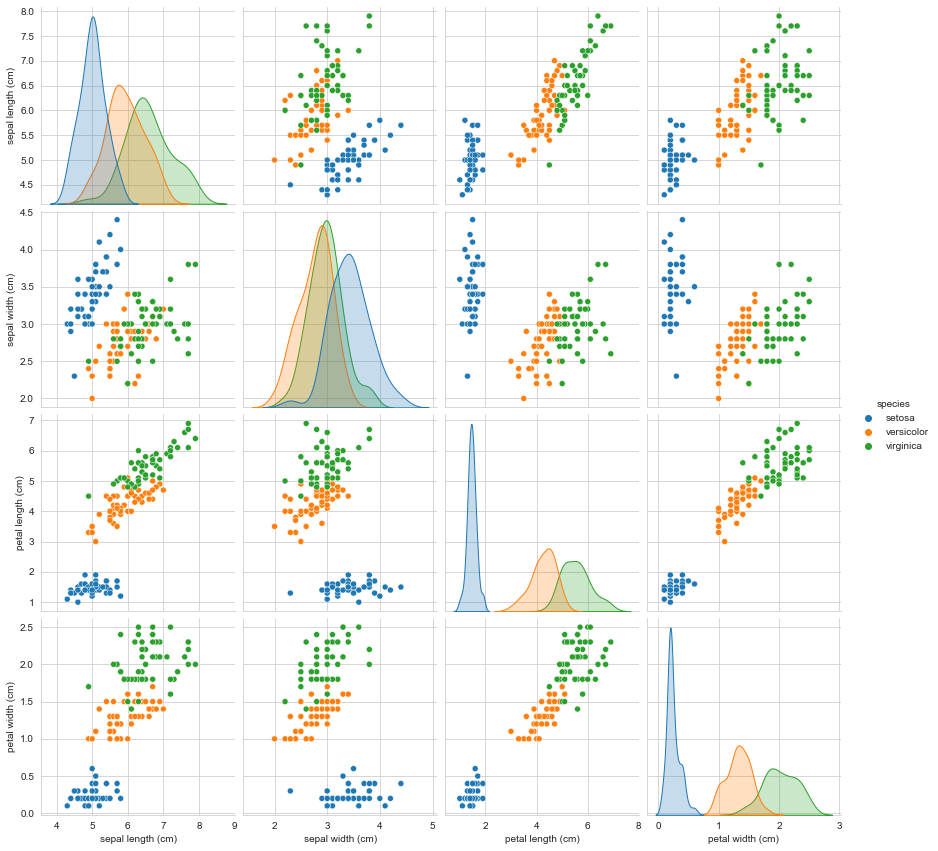

In [8]:
sns.pairplot(data_df, hue='species', height=3);

Last but not least, let's check species distribution in the dataset.

<AxesSubplot:xlabel='species', ylabel='count'>

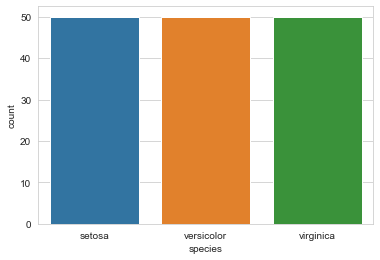

In [9]:
sns.countplot(x="species", data=data_df)

Nice! Each species is equally represented in the dataset. So the accuracy metric can be a good metric after all.

TODO: EDA

TODO: Solving classification problem

TODO: Exercises

## Resources

```{bibliography}
:filter: docname in docnames
```